In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection

from sklearn.datasets import load_boston
boston = load_boston()

bos = pd.DataFrame(boston.data)

bos.columns = boston.feature_names
bos['PRICE'] = boston.target

bos = (bos - bos.mean())/(bos.max()-bos.min())

X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']


X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.33, random_state = 5)

m,n=X_train.shape
o,p=X_test.shape
ones = np.ones((m,1))
X_train=np.hstack((ones,X_train))
X_test=np.hstack((np.ones((o,1)),X_test))
theta = np.zeros([n+1])
iterations = 1500
alpha = 0.01

def computeCost(X_train,Y_train,theta,m):
    temp = np.dot(X_train,theta) - Y_train
    return np.sum(np.power(temp,2))/(2*m)

def gradientDescent(X,theta,Y,alpha,iterations):
    for a in range (iterations):
        temp = np.dot(X,theta) - Y
        deriv = np.dot(X.T,temp)
        theta = theta - ( (alpha/m) * deriv)
    return theta

theta = gradientDescent(X_train,theta,Y_train,alpha,iterations)

J = computeCost(X_train,Y_train,theta,m)
print(J,'For training')

J = computeCost(X_test,Y_test,theta,o)
print(J,'For Cross Validation')

0.00801258777618364 For training
0.01115234953121882 For Cross Validation


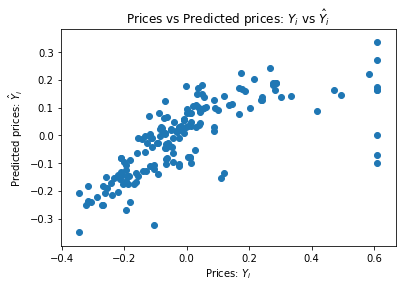

In [2]:
plt.scatter(Y_test, np.dot(X_test,theta))
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()